<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('/content/adult.csv')

In [ ]:
data.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
display(data.isna().sum())

,0
Age,0
Workclass,0
fnlgwt,0
Education,0
Education Num,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
data['Above/Below 50k'].value_counts()

,count
Above/Below 50k,
<=50K,24720
>50K,7841


In [ ]:
data['Above/Below 50k'].describe()

,Above/Below 50k
count,32561
unique,2
top,<=50K
freq,24720


In [ ]:
data['Above/Below 50k'] = data['Above/Below 50k'].map({' <=50K': 0, ' >50K': 1})

In [ ]:
data['Above/Below 50k'].value_counts()

,count
Above/Below 50k,
0,24720
1,7841


In [ ]:
data['sqrtEducation Num'] = np.sqrt(data['Education Num'])
data['logEducation Num'] = np.log(data['Education Num'])
data['sqrtHours/Week'] = np.sqrt(data['Hours/Week'])
data['logHours/Week'] = np.log(data['Hours/Week'])
data['sqrtAge'] = np.sqrt(data['Age'])
data['logAge'] = np.log(data['Age'])
data['interaction_Age_Hours/Week'] = data['Age'] * data['Hours/Week']
data['interaction_Education Num_Hours/Week'] = data['Education Num'] * data['Hours/Week']
data['interaction_Education Num_Age'] = data['Education Num'] * data['Age']
data['interaction_Hours/Week_Age'] = data['Hours/Week'] * data['Age']

In [ ]:
correlation_with_saleprice = data.corr(numeric_only=True) # Calculate correlation only for numeric columns
correlation_with_saleprice = correlation_with_saleprice['Above/Below 50k'].sort_values(ascending=False)
print(correlation_with_saleprice)

Above/Below 50k                         1.000000
interaction_Education Num_Age           0.393086
interaction_Education Num_Hours/Week    0.371399
Education Num                           0.335154
interaction_Hours/Week_Age              0.323706
interaction_Age_Hours/Week              0.323706
sqrtEducation Num                       0.313972
logEducation Num                        0.282535
logAge                                  0.269104
sqrtAge                                 0.253420
Age                                     0.234037
Hours/Week                              0.229689
sqrtHours/Week                          0.223788
Capital Gain                            0.223329
logHours/Week                           0.200189
Capital Loss                            0.150526
fnlgwt                                 -0.009463
Name: Above/Below 50k, dtype: float64


In [ ]:
display(data.isnull().sum())

,0
Age,0
Workclass,0
fnlgwt,0
Education,0
Education Num,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
data.head(100)

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,1
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,1
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,0


In [ ]:
data['Education Num'].value_counts()

,count
Education Num,
9,10501
10,7291
13,5355
14,1723
11,1382
7,1175
12,1067
6,933
4,646


In [ ]:
# prompt: how to balanced data between (0, 1) in Above/Below 50k to achieve best results in this model

# Using SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Train your model using the balanced training data
# For example, with Logistic Regression:
model = LogisticRegression()
model.fit(x_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ... (other evaluation metrics, like precision, recall, F1-score)

# You can also try other techniques like RandomUnderSampler or SMOTEENN
# to achieve the best results. Experiment with different methods and
# evaluate their performance on the test data to choose the best approach.



Class distribution after SMOTE:
Above/Below 50k
0    18569
1    18569
Name: count, dtype: int64
Accuracy: 0.7722638496499201


In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Get the correlation of all features with 'Above/Below 50k'
correlation_with_target = correlation_matrix['Above/Below 50k'].sort_values(ascending=False)

# Select the top N features with highest correlation (excluding the target itself)
top_n = 10  # Adjust the number of features you want to select
top_features = correlation_with_target[1:top_n+1].index.tolist()
print(top_features)
# Create a new DataFrame with only the selected features and the target
data_selected = data[top_features + ['Above/Below 50k']]
data_selected
# Now, 'data_selected' contains only the most correlated features and the target variable.
# You can proceed with your model training using this new DataFrame.

# Split the data into training and testing sets

['Education Num', 'Age', 'Hours/Week', 'Capital Gain', 'Capital Loss', 'fnlgwt']


,Education Num,Age,Hours/Week,Capital Gain,Capital Loss,fnlgwt,Above/Below 50k
0,13,39,40,2174,0,77516,0
1,13,50,13,0,0,83311,0
2,9,38,40,0,0,215646,0
3,7,53,40,0,0,234721,0
4,13,28,40,0,0,338409,0
...,...,...,...,...,...,...,...
32556,12,27,38,0,0,257302,0
32557,9,40,40,0,0,154374,1
32558,9,58,40,0,0,151910,0
32559,9,22,20,0,0,201490,0


In [ ]:
features = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'] # Only drop categorical features
x = data.drop(features, axis=1)
y = data['Above/Below 50k']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)
print(f"Data size: {len(x)}\nTraining data size: {len(x_train)}\nTesting data size: {len(x_test)}")

Data size: 32561
Training data size: 24420
Testing data size: 8141


In [ ]:
!pip install category_encoders
import category_encoders as ce
encoder = ce.OneHotEncoder(handle_unknown='ignore')
x_train = encoder.fit_transform(x_train)

In [ ]:
'''smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)'''

rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_balanced.value_counts())

Class distribution after SMOTE:
Above/Below 50k
 <=50K    5868
 >50K     5868
Name: count, dtype: int64


In [ ]:
'''# Create a list of columns with numerical features
numerical_features = ['Age', 'fnlgwt', 'Education Num', 'Capital Gain',
                     'Capital Loss', 'Hours/Week']

# Select only the numerical features for scaling
x_train_num = x_train[numerical_features]
x_test_num = x_test[numerical_features]'''

"# Create a list of columns with numerical features\nnumerical_features = ['Age', 'fnlgwt', 'Education Num', 'Capital Gain',\n                     'Capital Loss', 'Hours/Week']\n\n# Select only the numerical features for scaling\nx_train_num = x_train[numerical_features]\nx_test_num = x_test[numerical_features]"

In [ ]:
# preprocessing
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = x_train.select_dtypes(include=['number']).columns

# Exclude one-hot encoded columns for the target variable
numerical_features = numerical_features[~numerical_features.str.startswith('Above/Below 50k')]

# Fit and transform on numerical features only
x_train_transformed = scaler.fit_transform(x_train[numerical_features])
x_test_transformed = scaler.transform(x_test[numerical_features])


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(x_train_transformed, y_train)
y_hat_knn = knn.predict(x_test_transformed)

In [ ]:
acc = accuracy_score(y_test, y_hat_knn)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_knn)
print(report)

Model accuracy was 80.64%
              precision    recall  f1-score   support

       <=50K       0.85      0.90      0.88      6168
        >50K       0.63      0.50      0.56      1973

    accuracy                           0.81      8141
   macro avg       0.74      0.70      0.72      8141
weighted avg       0.80      0.81      0.80      8141



<ipython-input-216-526b36b5a172>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Above/Below 50k', data=data, palette='viridis')


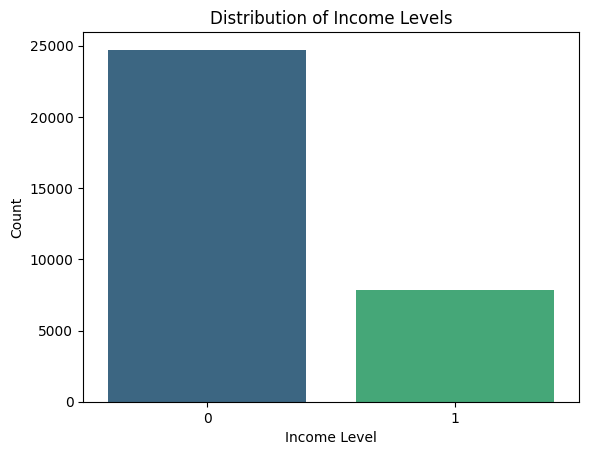

In [ ]:
sns.countplot(x='Above/Below 50k', data=data, palette='viridis')
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

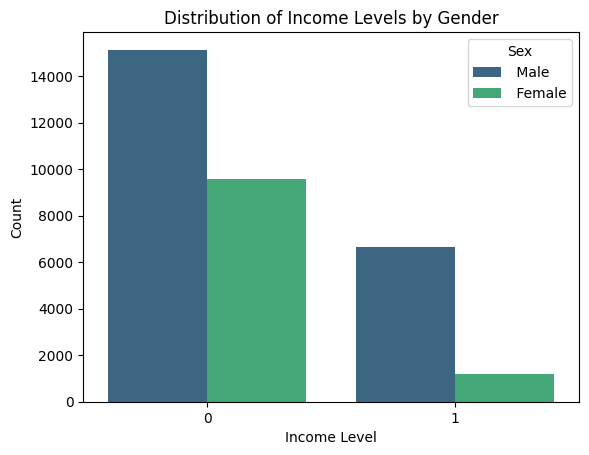

In [ ]:
sns.countplot(x='Above/Below 50k', hue='Sex', data=data, palette='viridis')
plt.title('Distribution of Income Levels by Gender')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

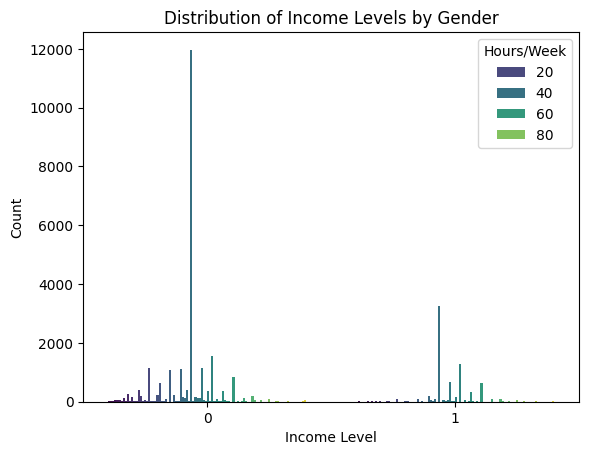

In [ ]:
sns.countplot(x='Above/Below 50k', hue='Hours/Week', data=data, palette='viridis')
plt.title('Distribution of Income Levels by Gender')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt

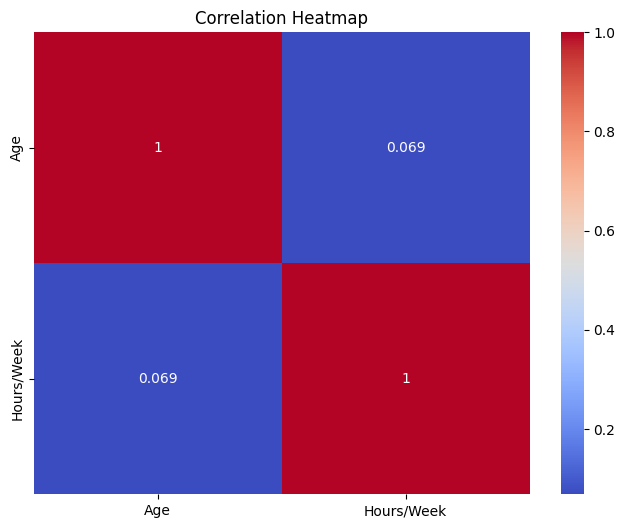

In [ ]:
# Calculate the correlation matrix
corr_matrix = data[['Age', 'Hours/Week']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Age', ylabel='Hours/Week'>

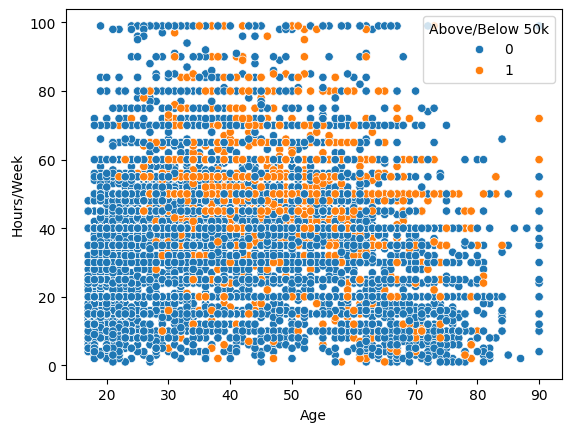

In [ ]:
sns.scatterplot(x='Age', y='Hours/Week', hue='Above/Below 50k', data=data)

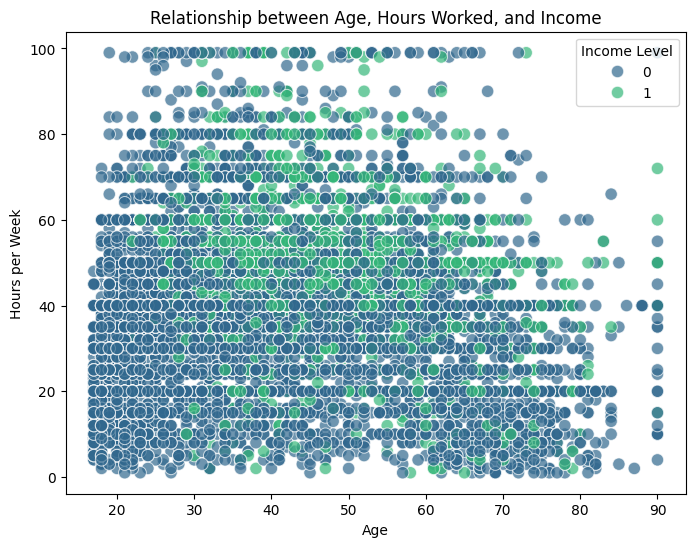

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.scatterplot(x='Age', y='Hours/Week', hue='Above/Below 50k', data=data,
                palette='viridis', s=80, alpha=0.7)
plt.title('Relationship between Age, Hours Worked, and Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Income Level')
plt.show()

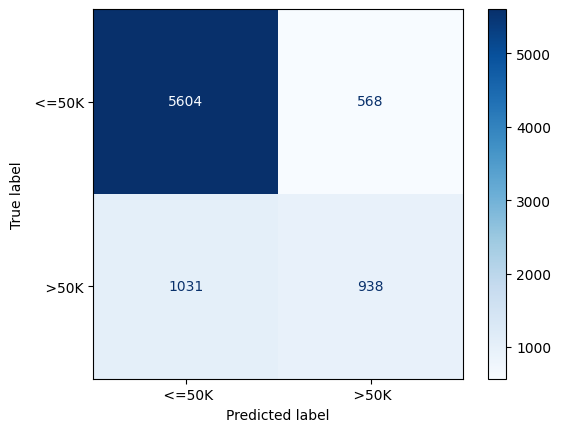

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_knn, cmap=plt.cm.Blues)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

num_samples = 1000  # Number of samples to generate

np.random.seed(42)
ages = np.random.randint(18, 80, size=num_samples)
hours_per_week = np.random.randint(10, 80, size=num_samples)
Education_Num = np.random.randint(413, 10500, size=num_samples)
Capital_Loss = np.random.randint(1, 100000, size=num_samples)
Capital_Gain = np.random.randint(1, 100000, size=num_samples)

new_data = pd.DataFrame({
    'Age': ages,
    'Hours/Week': hours_per_week,
    'Education Num': Education_Num,
    'Capital Gain': Capital_Gain,
    'Capital Loss': Capital_Loss

})

new_data.to_csv('synthetic_data.csv', index=False)

print("تم إنشاء البيانات وحفظها في ملف 'synthetic_data.csv'")

تم إنشاء البيانات وحفظها في ملف 'synthetic_data.csv'
